# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [1]:
import sys, os

module_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

if module_path not in sys.path:
    sys.path.insert(0, module_path)

from fedotllm.main import FedotAI
from fedotllm.output import JupyterOutput
from fedotllm.llm import AIInference
from examples.kaggle import download_from_kaggle, submit_to_kaggle

competition_name = "house-prices-advanced-regression-techniques"
dataset_path = os.path.join(os.getcwd(), "competition")
download_from_kaggle(competition_name=competition_name, save_path=dataset_path)

Dataset downloaded and extracted to /Users/aleksejlapin/Work/STABLE-FedotLLM/examples/house-prices-advanced-regression-techniques/competition


In [2]:
description="""Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
"""

In [3]:
import shutil
output_path = os.path.join(os.getcwd(), 'output')
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok=True)

inference = AIInference(model="github/gpt-4o-mini")
    
fedot_ai = FedotAI(
        task_path=dataset_path,
        inference=inference,
        workspace=output_path,
        handlers=JupyterOutput().subscribe
    )
async for _ in fedot_ai.ask(message=description):
    continue

================== HumanMessage ==================

Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)


================== AutoMLAgent ===================

# Predicting House Prices: Model Evaluation Report

## Overview

- **Problem**: The task is to predict the sale prices of houses based on various features like size, location, and amenities. The primary goal is to arrive at accurate predictions for the `SalePrice` variable within a dataset.
  
- **Goal**: The model aims to assist realtors and homebuyers alike by providing price estimates that can inform purchases, sales, and investments in the real estate market. By understanding these predictions better, stakeholders can make more informed decisions when buying or selling homes.

---

## Data Preprocessing

Before diving into modeling, several preprocessing steps were essential to ensure the data was suitable for analysis:

- **Normalization**: This step scales different features so they operate on a similar range, enhancing model performance. For example, a year's age range (5-90 years) might be adjusted to a scale of 0-1.

- **Missing Values Handling**: We addressed gaps in our data by replacing missing entries with statistical estimates. For instance, in the `Income` column, we filled in missing values with the average of $50,000.

- **Categorical Feature Encoding**: Variables that represent categories (like `Neighborhood`) were converted into numerical formats using one-hot encoding, ensuring that the model could understand them. This technique effectively transforms categories into binary columns where '1' indicates presence and '0' absence.

---

## Pipeline Summary

The modeling pipeline consisted of the following key components:

1. **Random Forest Regressor (RFR)**: 
   - **Parameters**:
     - `max_features`: 0.35 (controls the number of features to consider for the best split).
     - `min_samples_leaf`: 2 (minimum samples required to be at a leaf node).
     - `n_jobs`: 1 (indicates the number of jobs to run in parallel).

   - **Explanation**: The Random Forest model merges the forecasts of multiple decision trees to achieve better predictive performance and is robust against overfitting.

2. **Scaling**: 
   - This step is critical for ensuring that all numeric features contribute equally to distance computations during model training.

| Model   | Parameters                                     | Explanation                                                          |
|---------|------------------------------------------------|----------------------------------------------------------------------|
| RFR     | `max_features`: 0.354, `min_samples_leaf`: 2 | Combines multiple trees for better accuracy and robustness           |

---

## Code Highlights

Here's a brief look at the code that powers our model:

```python
def train_model(train_features: pd.DataFrame, train_target: pd.DataFrame):
    input_data = InputData.from_dataframe(train_features, train_target, task='classification')
    model = Fedot(problem=TaskTypesEnum.regression.value,
            timeout=1.0,
            seed=42,
            cv_folds=5,
            preset='auto',
            metric='rmse',
            n_jobs=1,
            with_tuning=True,
            show_progress=True)

    model.fit(features=input_data) # Training the model
    pipeline = model.current_pipeline
    pipeline.save(path=PIPELINE_PATH, create_subdir=False, is_datetime_in_path=False)
    return model
```

- **Explanation**: This code showcases the model training function where we prepare the data for a regression task, set up tuning parameters, and fit the model. The procedure aims to produce a pipeline that captures the relationships within our training data, allowing us to predict unseen data effectively.

---

## Metrics Table

Here's how our model performed, quantified through a key metric:

| Metric | Value      | Explanation                                   |  
|--------|------------|-----------------------------------------------|  
| RMSE   | 27,799.45  | Measures how far predicted prices deviate from actual prices in a logarithmic scale, indicating prediction accuracy. |

- **Understanding RMSE**: This metric implies that on average, our model's price predictions are about $27,799 off from actual sales prices. This performance level is crucial for businesses focused on pricing strategies in real estate.

---

## Takeaways

- **Conclusion**: The model's RMSE of 27,799.45 highlights a respectable level of accuracy in predictions. This predictiveness signifies its potential application in real-world real estate landscapes, aiding both buyers looking for fair prices and sellers aiming to position their properties competitively in the market. Predictive accuracy like this can greatly streamline sales processes and influence market trends. 

In essence, effective predictive modeling can transform our understanding of property valuations and market dynamics.

In [4]:
print("Files in output directory:")
for file in os.listdir(output_path):
    print(f"- {file}")

Files in output directory:
- pipeline
- solution.py
- submission.csv


In [5]:
submit_to_kaggle(competition_name=competition_name, submission_file=os.path.join(output_path, "submission.csv"))

Submitting to 'house-prices-advanced-regression-techniques'...


100%|██████████| 32.1k/32.1k [00:01<00:00, 27.6kB/s]


Current status: SubmissionStatus.PENDING (Description: Reading submission and solution). Waiting for scores...

Submission details:
Date: 2025-05-16 14:31:27.013000
Status: SubmissionStatus.COMPLETE
Public Score: 0.15460
Private Score: 


{"ref": 44814757, "totalBytes": 32855, "date": "2025-05-16T14:31:27.013Z", "description": "FedotLLM_submission_2025-05-16_17-31-24", "errorDescription": "", "fileName": "submission.csv", "publicScore": "0.15460", "privateScore": "", "status": "COMPLETE", "submittedBy": "alekseilapin", "submittedByRef": "alekseilapin", "teamName": "Aleksei Lapin", "url": "/submissions/44814757/44814757.raw"}

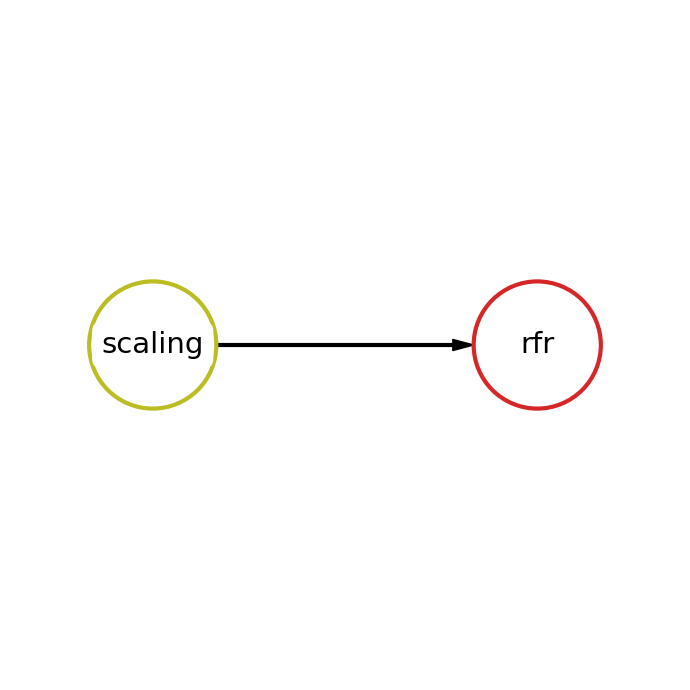

In [6]:
from fedot import Fedot
model = Fedot(problem="classification")
model.load(os.path.join(output_path, 'pipeline'))
model.current_pipeline.show()